# Artificial Neural Network

### Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

### Concatenate the Data Frames

In [4]:
X=pd.concat([X,geography,gender],axis=1)

In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2 - Now let's make the ANN!

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))

In [11]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [12]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [13]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

C:\Users\win10\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5487 - accuracy: 0.7936 - val_loss: 0.5196 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5100 - accuracy: 0.7960 - val_loss: 0.4993 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4921 - accuracy: 0.7962 - val_loss: 0.4866 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.7962 - val_loss: 0.4771 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4703 - accuracy: 0.7962 - val_loss: 0.4703 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4630 - accuracy: 0.7962 - val_loss: 0.4651 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4570 - accuracy: 0.7962 - val_loss: 0.4611 - val_accuracy: 0.7955

In [15]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


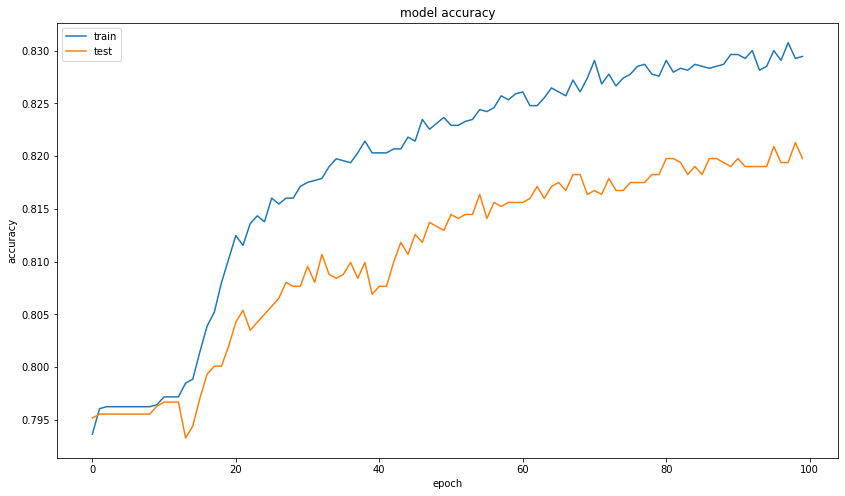

In [16]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

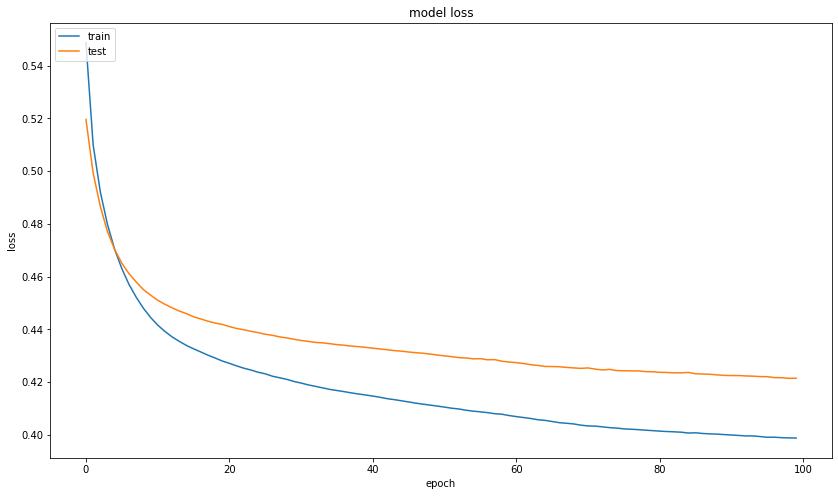

In [17]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Part 3 - Making the predictions and evaluating the model

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 965us/step


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[1546,   49],
       [ 270,  135]], dtype=int64)

In [21]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8405